In [9]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('../ML/news-articles/Articles.csv', encoding = "ISO-8859-1")

In [11]:
data["Article"] = data["Article"].str.replace("strong>", "")
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r'[^\w]', ' ', s) # Убирает печатные символы не являющиеся буквами или цифрами - знаки препинания, апострофы и т.д.
    s = re.sub("\d+", "", s) # убирает числа
    s = re.sub('\s+', ' ', s) # заменяет все непечатные пробельные символы \s на ' '
    return s
data['Article'] = [cleaning(s) for s in data['Article']]

In [12]:
sports = data[data['NewsType'] == 'sports']
business = data[data['NewsType'] == 'business']
sportsWords = pd.Series(' '.join(sports['Article'].astype(str)).lower().split(" ")).value_counts()
businessWords = pd.Series(' '.join(business['Article'].astype(str)).lower().split(" ")).value_counts()
businessWords.head()



the    23168
to     11420
of     10777
in     10147
and     8347
dtype: int64

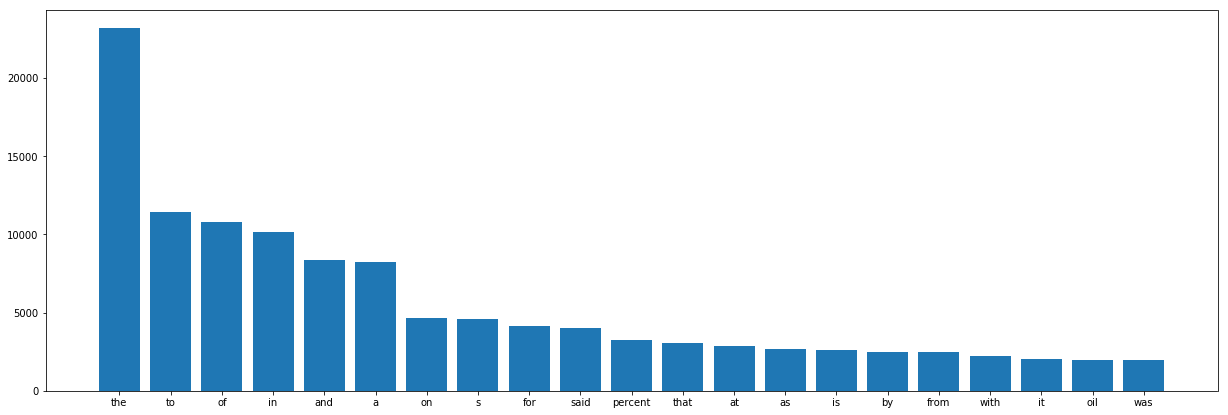

In [13]:
bar_width = 0.8
x = range(len(businessWords.head(21).keys()))
plt.figure(figsize=(21,7))
ax = plt.subplot()
ax.bar(x, businessWords.head(21), width = bar_width)
ax.set_xticks(x)
ax.set_xticklabels(businessWords.head(21).keys())
plt.show()

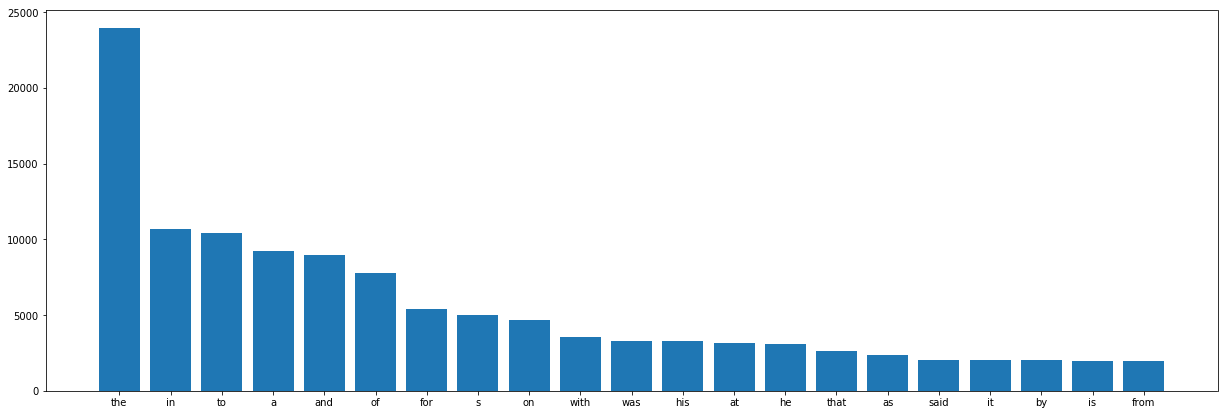

In [14]:
bar_width = 0.8
x = range(len(sportsWords.head(21).keys()))
plt.figure(figsize=(21,7))
ax = plt.subplot()
ax.bar(x, sportsWords.head(21), width = bar_width)
ax.set_xticks(x)
ax.set_xticklabels(sportsWords.head(21).keys())
plt.show()